# running MIRAR for SEDMv2
##### *written by Saarah Hall (saarah@u.northwestern.edu) June 13, 2023*

To reduce and analyze photometric data from SEDMv2, we are utilizing the *Modular Image Reduction and Analysis Resource ([MIRAR](https://github.com/winter-telescope/winterdrp))* package. The documentation lives [here.](https://winterdrp.readthedocs.io/en/latest/index.html)
Currently, MIRAR supports the following instruments: WINTER, SUMMER, and SEDMv2. This package makes it easy to customize a pipeline for any observational instrument and set of science goals.

In [1]:
import os
import glob
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

#### Installing MIRAR and its dependencies
---
MIRAR's installation instructions are on [this page](https://winterdrp.readthedocs.io/en/latest/installation.html) of the docs. I'll summarize the steps here:

1. set up a new conda environment and activate it by running the following lines in your terminal. (you can name the environment anything you'd like, it's named `pipeline` in the example below)

> `conda create -n pipeline python=3.11`

> `conda activate pipeline`

> `pip install --upgrade pip`

2. install `mirar` with pip (run this in your terminal):

> `pip install mirar`

3. download astromatic software by running this in your terminal:

> `conda install -c conda-forge astromatic-source-extractor astromatic-scamp astromatic-swarp astromatic-psfex`

4. finally, download a local version of **astrometry.net** and grab some index files. You can follow the instructions [here](http://astrometry.net/use.html) (and also [here](http://astrometry.net/doc/build.html#build)). (The **astrometry.net** documentation is outdated and confusing, so reach out to me on Slack if you have trouble with this step.) If you're on a Mac, I recommend using homebrew. Once **astrometry.net** is installed, locate the package on your machine. When I installed it using homebrew, mine was located here: `/opt/homebrew/Cellar/astrometry-net/0.93`. Once you've located this path, make a new folder inside of it called "data". Use `cd` to move into this "data" folder, which is where the index files should go. Grab index files from [this directory](https://portal.nersc.gov/project/cosmo/temp/dstn/index-5200/LITE/) using `wget`:

> `wget -r -nd -R "index.html*" https://portal.nersc.gov/project/cosmo/temp/dstn/index-5200/LITE/`

This might download lot of folders and subfolders, but the index files (`index-####-##.fits`) are what you need. If this is the case, move the index files from the chain of subfolders and into the "data" folder that you created.

---

#### Path configuration and "starter-pack" data

The pipeline takes in raw data and outputs processed data, so we need to define where those two types of data (raw and output) belong on your machine. Define the paths for `RAW_DATA_DIR` and `OUTPUT_DATA_DIR` by modifying the code below and then running it. For the example below, I created two folders "rawdata" and "outputdata" on my Desktop and then ran this cell.

In [2]:
## change the paths to reflect your chosen directories!
# define the raw data directory
%env RAW_DATA_DIR=/Users/saarahhall/Desktop/rawdata
# define the output data directory
%env OUTPUT_DATA_DIR=/Users/saarahhall/Desktop/outputdata
# choose to not use a cache ()
%env USE_WINTER_CACHE=False

env: RAW_DATA_DIR=/Users/saarahhall/Desktop/rawdata
env: OUTPUT_DATA_DIR=/Users/saarahhall/Desktop/outputdata
env: USE_WINTER_CACHE=False


The pipeline expects raw data to be organized like this:

> `RAW_DATA_DIR` / {instrument} / {night} / {raw} / {mef}

In our case, the instrument is `sedmv2`, and "night" is the date of observation (e.g. `20230425`). Inside the "raw" folder, there should be calibration files (biases and flats) taken on that night. Lastly, the science files (observations) are expected to exist in the "mef" folder, since SEDMv2 data are saved as MEF (multi-extension FITS) files.

This might sound confusing, but I've attached a sample folder called "sedmv2.zip" with this expected file structure. You should place sedmv2 inside your `RAW_DATA_DIR` path and unzip the folder.

*Phew!* Installation and set-up aside, we are ready to run MIRAR!

### Running the pipeline
---

In [3]:
import mirar
from mirar.pipelines.sedmv2 import SEDMv2Pipeline

Depending on which night you choose, the cell below can take up to ~20 minutes to run. You can expect to see a long list of warnings, all of which are okay. Things only go wrong if an error is thrown.

In [4]:
# define the pipeline with desired configuration (let's stick to "default" for now)
mypipeline = SEDMv2Pipeline(selected_configurations=["default"], 
    night='20230425') # you can change this string to any night you have available 

# execute the pipeline
data, errorstack = mypipeline.reduce_images(catch_all_errors=False)

You are choosing to run Swarp without combining the image. This causes swarp to output an intermediate image, with possibly incorrect FLXSCALE values. Please consider running with combine=True, it almost always gives the same result as running it without, but will have consistent headers.
You are choosing to run Swarp without combining the image. This causes swarp to output an intermediate image, with possibly incorrect FLXSCALE values. Please consider running with combine=True, it almost always gives the same result as running it without, but will have consistent headers.
You are choosing to run Swarp without combining the image. This causes swarp to output an intermediate image, with possibly incorrect FLXSCALE values. Please consider running with combine=True, it almost always gives the same result as running it without, but will have consistent headers.
WARNINGYou are choosing to run Swarp without combining the image. This causes swarp to output an intermediate image, with possibly

You are choosing to run Swarp without combining the image. This causes swarp to output an intermediate image, with possibly incorrect FLXSCALE values. Please consider running with combine=True, it almost always gives the same result as running it without, but will have consistent headers.
You are choosing to run Swarp without combining the image. This causes swarp to output an intermediate image, with possibly incorrect FLXSCALE values. Please consider running with combine=True, it almost always gives the same result as running it without, but will have consistent headers.
You are choosing to run Swarp without combining the image. This causes swarp to output an intermediate image, with possibly incorrect FLXSCALE values. Please consider running with combine=True, it almost always gives the same result as running it without, but will have consistent headers.
You are choosing to run Swarp without combining the image. This causes swarp to output an intermediate image, with possibly incorr

Saving tracebacks of caught errors to /Users/saarahhall/Desktop/outputdata/sedmv2/20230425/20230425_error_stack.txt


In [5]:
# if this is empty, then there really were no errors!
errorstack.reports

[]

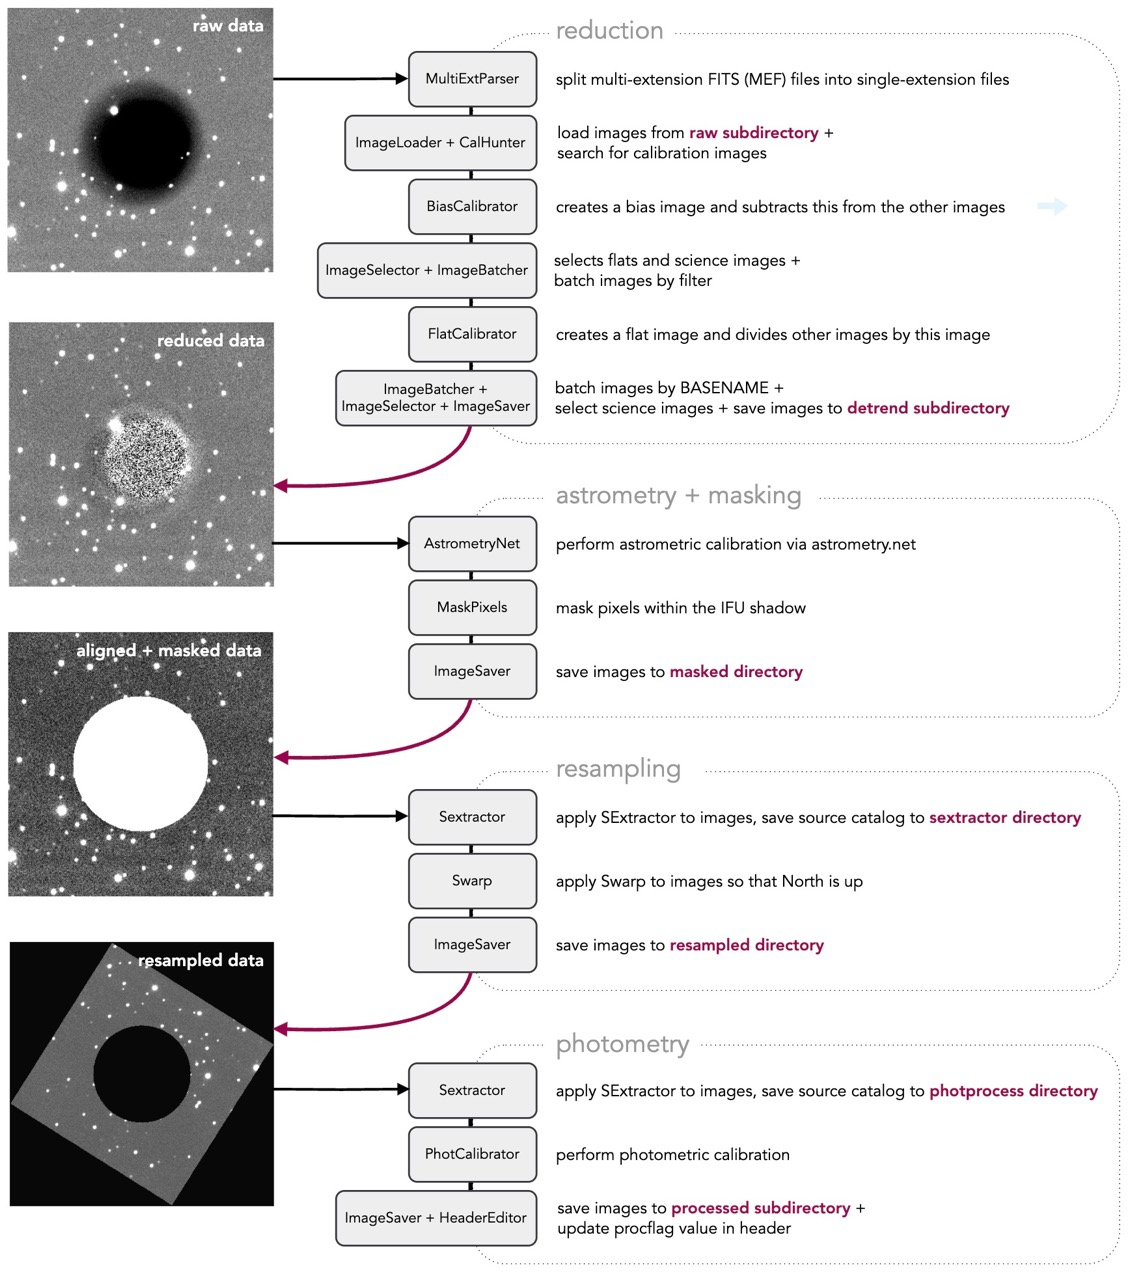

In [6]:
# for extra context, and some idea of what each subdirectory should contain,
# here is a visualization I made for SEDMv2's default pipeline configuration.
# there won't be a "masked" directory in your output directory, as it isn't part of the latest package release.
from IPython.display import Image, display
display(Image(filename='flowchart.jpeg',width=700))

#### Look at the output data

If there are no errors, then let's check out the outputs! You can do this with SAOImage Ds9 by opening any FITS file in your output data directory. There should be several subfolders inside of the output directory now, each one containing outputs from different steps in the pipeline. There's lots to explore! 

You can also look at the outputs inside this notebook (using plt.imshow with images, using astropy.Table for catalogs), as I've done in the cells below.

In [7]:
print('you just reduced ', len(data.get_batches()), 'image batches!')
print('there is/are', len(data.get_batches()[0].get_batch()), 'image(s) in the first batch.')

you just reduced  31 image batches!
there is/are 1 image(s) in the first batch.


In [8]:
# change the number to grab any one of the reduced image batches
batch0 = data.get_batches()[0]
# change the number to grab any one of the images in the selected image batch (unless there is only one image in the batch)
img_object = batch0.get_batch()[0]
# define the image and header data
img = img_object.get_data()
hdr = img_object.get_header()

In [9]:
# take a look at the header
hdr

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 1414 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                 1411 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.154400000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   1.328786901972E+02 / World coordinate on this axis                  
CRPIX1  =   7.080000000000E+

Text(0, 0.5, 'calibrated counts')

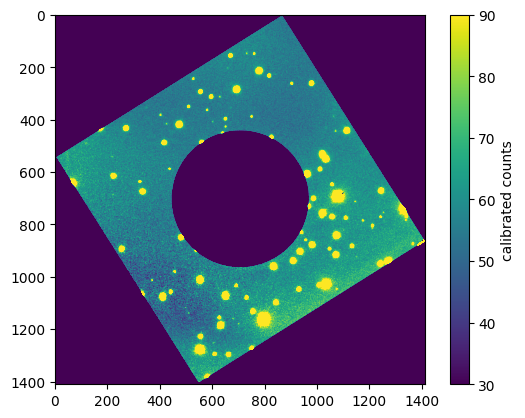

In [10]:
# use matplotlib to visualize the data
# you may need to mess with vmin and vmax values to see anything interesting
plt.imshow(img, vmin=30,vmax=90)
cbar = plt.colorbar()
# colorbar limits defined by vmin and vmax
cbar.ax.set_ylabel('calibrated counts')

# how would you describe the quality of this image? do you notice anything strange?
# (there's a circle in the middle of the image to mask out the IFU shadow, and the image is tilted such that North is up)

/Users/saarahhall/Desktop/rawdata
/Users/saarahhall/Desktop/rawdata/sedmv2/20230425/raw/kped_20230425_030915_NGC2682_si_o_0000_1.fits


Text(0.5, 1.0, 'processed data')

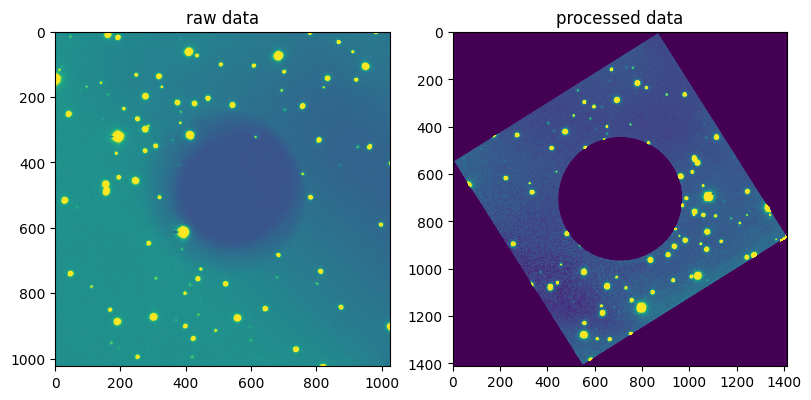

In [11]:
# how does this image compare to the raw version? use the base name of the image to find the original file and visualize it
# grab the environment variable "RAW_DATA_DIR" that you defined earlier
rawpath = os.environ['RAW_DATA_DIR']
print(rawpath)

# based on the expected file name structure, find the corresponding raw image to compare to
base_proc_img = img_object.base_name.split('resamp')[0]
night = base_proc_img.split('_')[1]
orig_img_dir = rawpath + '/sedmv2/' + night + '/raw/' + base_proc_img
orig_img_path = glob.glob(orig_img_dir+'fits')[0]
print(orig_img_path)

# open the original image with astropy.io
orig_img = fits.open(orig_img_path)[0].data

# visualize side-by-side
fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='constrained')
axs[0].imshow(orig_img, vmin=400,vmax=800)
axs[0].set_title('raw data')
axs[1].imshow(img, vmin=30,vmax=140)
axs[1].set_title('processed data')

There are more than just images to look at, there are catalogs created by SourceExtractor. Let's open one of those with Astropy.table:

In [12]:
# find the path to the SourceExtractor catalog that was made for this image
outpath = os.environ['OUTPUT_DATA_DIR']
base_proc_img = img_object.base_name.split('resamp')[0]
night = base_proc_img.split('_')[1]
tabpath = glob.glob(outpath + '/sedmv2/' + night + '/photprocess/' + base_proc_img + '*.cat')[0]
print(tabpath)

# use astropy table to read the SourceExtractor catalog
source_cat = Table.read(tabpath, hdu=2)

/Users/saarahhall/Desktop/outputdata/sedmv2/20230425/photprocess/kped_20230425_030915_NGC2682_si_o_0000_1.resamp.cat


In [13]:
source_cat
# each row in this table represents one source that's been detected in our processed image
# you can make a lot of interesting plots using just this table, for example:
# - make a histogram of all the MAG_AUTO values to get a sense of how bright the objects in this image are
# - plot X_IMAGE and Y_IMAGE on top of the processed image to see which sources were detected by SourceExtractor

ALPHAWIN_J2000,DELTAWIN_J2000,X_IMAGE,Y_IMAGE,ELONGATION,ELLIPTICITY,XWIN_IMAGE,YWIN_IMAGE,ERRAWIN_IMAGE,ERRBWIN_IMAGE,FLUX_RADIUS,FWHM_WORLD,FWHM_IMAGE,FLUX_AUTO,FLUXERR_AUTO,FLUX_MAX,MAG_AUTO,MAGERR_AUTO,FLAGS,BACKGROUND,CLASS_STAR,FLUX_APER,FLUXERR_APER,MAG_APER,MAGERR_APER,VIGNET,SNR_WIN
deg,deg,pix,pix,,,pix,pix,pix,pix,pix,deg,pix,ct,ct,ct,mag,mag,,ct,,ct,ct,mag,mag,ct,
float64,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32[7],float32[7],float32[7],float32[7],"float32[41,41]",float32
132.8740013,11.7519692,759.4560,152.1357,1.089,0.082,759.5283,152.0643,0.06769,0.06769,2.670,0.0006796659,7.63,3309.008,75.30859,108.1043,-8.7992,0.0247,0,58.12347,0.199,977.7979 .. 0,34.91227 .. 0,-7.4756 .. 0.0000,0.0388 .. 0.0000,11.67429 .. 1.832088,48.23
132.8888141,11.8622704,593.3156,1388.9252,1.781,0.439,596.7897,1390.1543,0.00160,0.00160,6.860,0.002957579,33.20,945908.6,192.1251,7463.604,-14.9396,0.0002,17,65.49454,0.995,13663.81 .. 0,34.91227 .. 0,-10.3389 .. 0.0000,0.0028 .. 0.0000,8.297676 .. -65.6341,5182
132.8829039,11.8541042,661.7686,1298.5273,1.111,0.100,661.7116,1298.4905,0.00209,0.00209,2.551,0.0004501108,5.05,109988.6,91.97289,3895.148,-12.6034,0.0009,0,63.46771,0.983,38962.59 .. 0,34.80197 .. 0,-11.4766 .. 0.0000,0.0010 .. 0.0000,-27.86746 .. -0.5937805,1498
132.8876861,11.8539261,609.2400,1296.5219,1.135,0.119,609.1772,1296.4929,0.00577,0.00577,2.459,0.0004705705,5.28,36373.48,82.02902,1337.524,-11.4020,0.0024,0,62.15693,0.981,13552.74 .. 0,34.80197 .. 0,-10.3301 .. 0.0000,0.0028 .. 0.0000,18.79166 .. 5.785126,522.7
132.8745906,11.8520895,758.3489,1278.6929,2.549,0.608,753.0354,1275.8767,0.01162,0.01162,8.918,0.002598191,29.16,200435.3,206.1245,3394.355,-13.2549,0.0011,1,54.27367,0.516,7149.359 .. 0,34.80197 .. 0,-9.6357 .. 0.0000,0.0053 .. 0.0000,-12.15824 .. -64.9612,924.9
132.8928738,11.8523906,552.3302,1279.3762,1.091,0.084,552.1887,1279.2598,0.00015,0.00015,2.804,0.0005250144,5.89,1901966,113.9162,58046.2,-15.6980,0.0001,4,61.87672,0.985,583315.8 .. 0,34.69131 .. 0,-14.4148 .. 0.0000,0.0001 .. 0.0000,10.61813 .. 28.72529,2.316e+04
132.8926457,11.8479855,554.8208,1229.8597,1.117,0.104,554.6920,1229.8143,0.00153,0.00153,2.507,0.0004426546,4.97,145170.3,91.97289,5504.098,-12.9047,0.0007,0,57.88243,0.983,52010.23 .. 0,34.69131 .. 0,-11.7902 .. 0.0000,0.0007 .. 0.0000,-23.95146 .. 8.737255,2006
132.8856701,11.8441705,631.4091,1187.0309,1.070,0.066,631.3208,1186.9887,0.00049,0.00049,2.703,0.0004650455,5.22,529038.4,104.6817,17493.01,-14.3087,0.0002,0,55.91007,0.984,169834.2 .. 0,34.63585 .. 0,-13.0751 .. 0.0000,0.0002 .. 0.0000,14.66731 .. 8.018974,6705


In [14]:
# there are also reference catalogs (from PanStarrs1) which were used in the pipeline's calculation of the zeropoint.
outpath = os.environ['OUTPUT_DATA_DIR']
base_proc_img = img_object.base_name.split('resamp')[0]
night = base_proc_img.split('_')[1]
refpath = glob.glob(outpath + '/sedmv2/' + night + '/phot/' + base_proc_img + '*ps1.cat')[0]
print(refpath)
ref_cat = Table.read(refpath, hdu=2)
ref_cat

/Users/saarahhall/Desktop/outputdata/sedmv2/20230425/phot/kped_20230425_030915_NGC2682_si_o_0000_1.resamp.ps1.cat


RAJ2000,DEJ2000,objID,f_objID,Qual,e_RAJ2000,e_DEJ2000,_tab1_10,Ns,Nd,gmag,e_gmag,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,ra,dec,magnitude
deg,deg,,,,arcsec,arcsec,d,,,mag,mag,mag,mag,,mag,mag,mag,mag,,mag,mag,mag,mag,,mag,mag,mag,mag,,mag,mag,mag,mag,,deg,deg,mag
float64,float64,int64,int64,int16,float64,float64,float64,int16,int16,float64,float32,float64,float32,int32,float64,float32,float64,float32,int32,float64,float32,float64,float32,int32,float64,float32,float64,float32,int32,float64,float32,float64,float32,int32,float64,float64,float64
132.911558800,11.733624550,122081329116340852,310452224,37,0.0160,0.0160,55596.591134260,0,6,20.1547,0.0018,19.9949,0.0380,16778264,19.8210,0.0610,19.7283,0.0621,16778264,19.9971,0.0505,19.7113,0.0746,16778256,--,--,--,--,0,19.3035,0.0910,19.4431,0.1586,272,132.911558800,11.733624550,19.9971
132.913665590,11.726527230,122071329137972593,503635968,60,0.0035,0.0021,55986.319629630,5,78,16.8809,0.0028,16.9419,0.0033,115000,16.0855,0.0020,16.1536,0.0014,115000,15.7938,0.0016,15.8530,0.0020,115000,15.6804,0.0030,15.7392,0.0023,115000,15.5901,0.0063,15.6411,0.0140,115000,132.913665590,11.726527230,15.7938
132.931464500,11.745558980,122091329315015160,310452224,37,0.0140,0.0140,55599.110636570,0,5,19.9753,0.0244,19.9012,0.0199,16778264,19.4878,0.0204,19.6090,0.0816,1048,19.5478,0.0348,19.4052,0.0548,16778256,--,--,--,--,0,--,--,--,--,0,132.931464500,11.745558980,19.5478
132.929084940,11.743780590,122091329291223021,436527104,52,0.0107,0.0064,55880.768194440,5,63,19.2409,0.0227,19.5155,0.0498,115000,18.5262,0.0093,18.5303,0.0575,115000,18.2232,0.0161,18.3701,0.0000,115000,18.1624,0.0236,17.7179,0.2927,115000,17.8492,0.0050,15.2789,0.1542,16892216,132.929084940,11.743780590,18.2232
132.935896340,11.748207540,122091329359658374,436527104,52,0.0256,0.0153,56025.848194440,4,52,--,--,--,--,16416,20.2486,0.0353,--,--,16892216,19.4642,0.0809,19.4526,0.1266,115000,18.9502,0.0304,18.9399,0.0978,115000,18.7272,0.0203,18.6927,0.0927,115000,132.935896340,11.748207540,19.4642
132.931101320,11.740684090,122081329311139156,268959744,32,0.0125,0.0125,55936.088368060,0,9,14.5731,0.0017,13.8696,0.0014,24,10.6677,0.0013,11.9636,0.0539,24,10.7987,0.0010,13.1550,0.0010,16,12.0749,0.0010,12.0231,0.0010,24,13.4883,0.0000,13.4894,0.0000,24,132.931101320,11.740684090,10.7987
132.942646380,11.747702270,122091329426817733,503635968,60,0.0066,0.0034,55917.472037040,5,82,18.2819,0.0146,18.5627,0.0170,115000,17.7938,0.0063,18.0038,0.0145,115000,17.5780,0.0052,17.7316,0.0180,115000,17.5037,0.0052,17.6404,0.0209,115000,17.4350,0.0075,17.4362,0.0435,115000,132.942646380,11.747702270,17.5780
132.926572090,11.741341520,122091329266080106,436527104,52,0.0028,0.0026,55865.984756940,5,62,17.7463,0.0058,17.7474,0.0050,115000,17.1267,0.0065,17.1489,0.0028,115000,16.8951,0.0052,16.8488,0.0060,115000,16.7946,0.0051,16.7482,0.0226,115000,16.6991,0.0043,16.5619,0.0168,115000,132.926572090,11.741341520,16.8951


In [15]:
# speaking of zeropoint, those can be referenced found in the header:
print(hdr['ZP_AUTO']) # auto
print(hdr['ZP_4.0']) # ZP for aperture size of 4 pixels

26.00311848015009
24.66744789806632


### Extra credit: config files

If you've made it this far, you've successfully run the pipeline AND performed some quick analyses of the output data! Thank you for your efforts!! I can use your feedback to improve the documentation and make installation and analysis easier for future users, so please do send me a Slack message if any issues came up.

If you're still excited to help out, It's possible to tweak the results of the pipeline without getting too deep into the code. Parameters in the configuration files can change the way SExtractor / Swarp / other processors interact with SEDMv2 data. Let's find where those config files are on your machine!

In [16]:
from mirar.pipelines.sedmv2 import config

In [17]:
config.sextractor_astrometry_config

{'config_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/astrom.sex',
 'filter_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/default.conv',
 'parameter_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/astrom.param',
 'starnnw_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/default.nnw'}

In [18]:
config.sextractor_candidates_config

{'cand_det_sextractor_config': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/photomCat.sex',
 'cand_det_sextractor_nnw': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/default.nnw',
 'cand_det_sextractor_filter': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/default.conv',
 'cand_det_sextractor_params': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/Scorr.param'}

In [19]:
config.sextractor_photometry_config

{'config_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/photomCat.sex',
 'filter_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/default.conv',
 'parameter_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/photom.param',
 'starnnw_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/default.nnw'}

In [20]:
config.sextractor_reference_config

{'config_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/photomCat.sex',
 'parameter_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/photom.param',
 'filter_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/default.conv',
 'starnnw_path': '/Users/saarahhall/miniconda3/envs/tester/lib/python3.11/site-packages/mirar/pipelines/sedmv2/config/files/default.nnw'}

Those are a lot of paths... to a bunch of different config files... these are the especially interesting ones:
> ##### astrom.sex
    config file for SourcExtractor, specifically for astrometric calibrations

> ##### photomCat.sex
    config file for SourceExtractor, specifically for making photometric measurements of sources

> ##### config.swarp
    config file for Swarp

> ##### photom.psfex
    config file for PSFEx. (PSFEx isn't activated with the default pipeline configuration, so changes made here will not affect the dataproducts made with the code above. If you're curious about PSFEx, try to run the pipeline with the "default_stellar" configuration instead of "default", and run it on "20230425" data. This may result in some errors, as the different pipeline configurations are still under construction.)

> ##### scamp.conf
    config file for Scamp
    
    
You can open any of these files using the text editor of choice (I use Sublime). I encourage you to change values of any parameters with Y/N or numerical values (for example, SATUR_LEVEL or DETECT_THRESH in photomCat.sex), save changes, re-run the pipeline, and see how the data outputs change. This is a daunting task (since there are so many parameters and data products), but I will end the notebook here and leave you to explore!